In [1]:
# uncomment for interactive 3d plot
#%matplotlib qt

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import utils
import scipy
import sklearn.cluster

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
df1 = pd.read_csv('../dl_paper/SourceData_Figure_1.csv')
df4 = pd.read_csv('../dl_paper/SourceData_Figure_4.csv')

# Correlation with Enzyme

In [92]:
Lysc = df1[df1['Experiment'].str.find('LysC') != -1]
Lysn = df1[df1['Experiment'].str.find('LysN') != -1]
Trip = df1[df1['Experiment'].str.find('Trp') != -1]

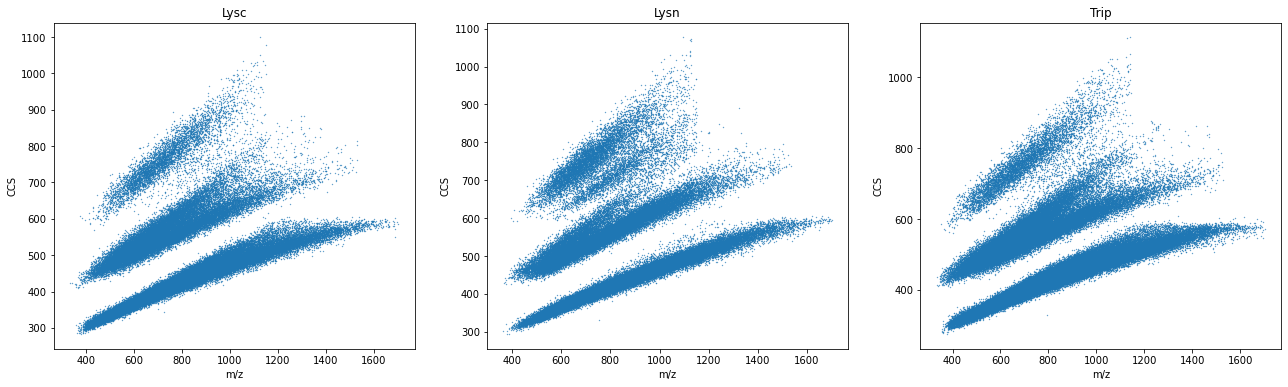

In [100]:
fig, ax_list = plt.subplots(nrows=1, ncols=3, figsize=(22,6))
for i, (ax, dfi) in enumerate(zip(ax_list,[Lysc, Lysn, Trip])):
    ax.scatter(dfi['m/z'], dfi['CCS'], s = 0.1)
    ax.set_xlabel('m/z')
    ax.set_ylabel('CCS')
    ax.set_title(f"{['Lysc', 'Lysn', 'Trip'][i]}")

# Correlation with Organism

In [98]:
Hela = df1[df1['Experiment'].str.find('HeLa') != -1]
Dros = df1[df1['Experiment'].str.find('Droso') != -1]
Cele = df1[df1['Experiment'].str.find('CEle') != -1]
Ecol = df1[df1['Experiment'].str.find('Ecol') != -1]
Yeast = df1[df1['Experiment'].str.find('Yeast') != -1]

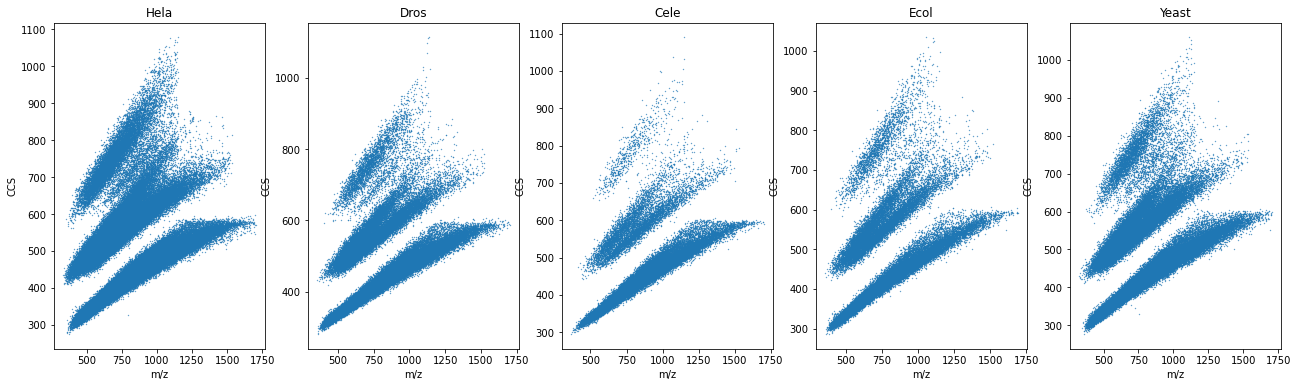

In [101]:
fig, ax_list = plt.subplots(nrows=1, ncols=5, figsize=(22,6))
for i, (ax, dfi) in enumerate(zip(ax_list,[Hela, Dros, Cele, Ecol, Yeast])):
    ax.scatter(dfi['m/z'], dfi['CCS'], s = 0.1)
    ax.set_xlabel('m/z')
    ax.set_ylabel('CCS')
    ax.set_title(f"{['Hela', 'Dros', 'Cele', 'Ecol', 'Yeast'][i]}")

# Clustering

In [48]:
df_ch4['Intensity'] = np.log1p(df_ch4['Intensity'])
df_ch4.head(5)

,Modified sequence,Sequence,Charge,Mass,m/z,Experiment,id,Intensity,Score,Length,Retention time,CCS
76,_(ac)AAAAVVEFQRAQSLLSTDREASIDILHSIV_,AAAAVVEFQRAQSLLSTDREASIDILHSIV,4,3251.71500,813.936028,HeLa_LysN,74,10.463389,60.140,30,105.710,829.14557
86,_(ac)AAADGGGPGGASVGTEEDGGGVGHRTVYLFDRRE_,AAADGGGPGGASVGTEEDGGGVGHRTVYLFDRRE,4,3358.55627,840.646345,HeLa_LysN,76,10.501719,52.195,34,57.055,786.45715
173,_(ac)AAEDELQLPRLPELFETGRQLLDEVEVATEPAGSRIVQE_,AAEDELQLPRLPELFETGRQLLDEVEVATEPAGSRIVQE,4,4389.23399,1098.315770,HeLa_LysN,375,12.804362,170.920,39,106.190,975.18320
228,_(ac)AAGVEAAAEVAATEIKM(ox)EEESGAPGVPSGNGAPGPKG...,AAGVEAAAEVAATEIKMEEESGAPGVPSGNGAPGPKGEGERPAQNE,4,4474.08304,1119.528040,HeLa_LysN,601,14.038095,181.780,46,101.650,862.82845
342,_(ac)AARPQQPPM(ox)EM(ox)PDLSNAIVAQDEM(ox)GRPFI...,AARPQQPPMEMPDLSNAIVAQDEMGRPFIIVK,4,3638.78951,910.704654,Yeast_LysC,1444,15.333929,161.580,32,86.280,870.64950


In [49]:
from sklearn.mixture import GaussianMixture

In [50]:
df_ch4 = df1[df1['Charge']==4]
df_ch4 = df_ch4[df_ch4['Retention time'] < 150]

<AxesSubplot:xlabel='m/z', ylabel='CCS'>

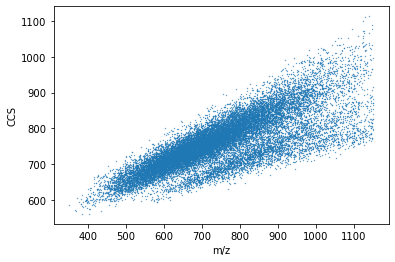

In [51]:
df_ch4.plot.scatter('m/z', 'CCS', s = 0.1)

# GMM

In [52]:
gm = GaussianMixture(n_components=2, random_state=0, covariance_type='full', reg_covar=1e-9, max_iter=1000)
labels = gm.fit_predict(df_ch4[['m/z','CCS', 'Intensity']])

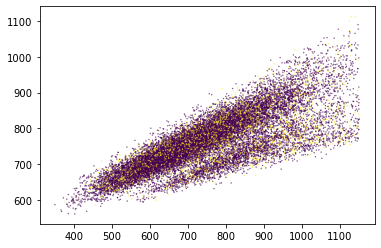

In [53]:
plt.scatter(df_ch4['m/z'], df_ch4['CCS'], s = 0.1, c = labels)

# Spectral Clustering

In [58]:
from sklearn.cluster import SpectralClustering

In [55]:
sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0)
sc.fit(df_ch4[['m/z','CCS', 'Intensity']])

NameError: name 'SpectralClustering' is not defined

In [1]:
plt.scatter(df_ch4['m/z'], df_ch4['CCS'], s = 0.1, c = sc.labels_)

NameError: name 'plt' is not defined

# DBSCAN

In [59]:
from sklearn.cluster import DBSCAN

In [81]:

dbscan = DBSCAN(eps=50, min_samples=10).fit(df_ch4[['m/z','CCS', 'Intensity']])

In [82]:
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3]), array([22532,    12,    10,    10,    10]))

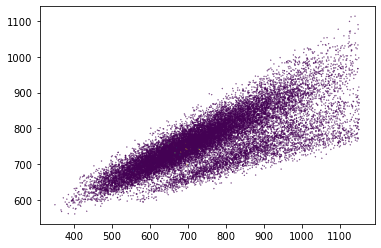

In [83]:
plt.scatter(df_ch4['m/z'], df_ch4['CCS'], s = 0.1, c = dbscan.labels_)

In [26]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])